## Proyección de Datos - Aeropuerto de Leipzig (DE)

### **Reporte No. 3** - Borrador de Proyecto

<p><strong>Asesor Principal</strong>: Prof. Álvaro Mauricio Montenegro Díaz, PhD <a>ammontenegrod@unal.edu.co</a> <br>
<strong>Asesor Suplente</strong>: Prof. Campo Elías Pardo Turriago, <a>cepardot@unal.edu.co</a> <br>
<strong>Autor</strong>: Alejandro Rios Serrano, <a>oarioss@unal.edu.co</a> </p>

#### Introduccion

la recoleccion y analisis de datos en la infraestructura permite una mejor planeación al proyectar futuras ampliaciones y mejoras en la construccion. La infraestructura instalada va copando su capacidad hasta que se hace necesaria una ampliación, nueva construccion o mejora de la capacidad. 

La proyección de uso en la infraestructura permite planear las ampliaciones y mejoras futuras con suficienta antelación para planear correctamente, conseguir permisos, desarrollar y ejecutar el proyecto.

<img src="https://miro.medium.com/max/1400/1*0o44SgYfO_NgbEbqRICftw.png" width="700" height="700">

   #### Descripción del Problema

El aeropuerto de Leipzig ha venido creciendo constantemente desde 1991, posicionandose como el segundo mayor aeropuerto de carga de Alemania detrás de Frankfurt [**Source**: Qualitätsbericht - Luftverkehrsteuer 04/2022](https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=1&levelid=1667651441718&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=46421-0005&auswahltext=&werteabruf=starten&wertauswahl=1695&wertauswahl=1696&wertauswahl=1697&wertauswahl=1698#abreadcrumb).

Durante la pandemia, cayó drásticamente el transporte de carga y especialmente pasajeros. Con análisis de datos se pretende proyectar la recuperación en el transporte de carga y pasajeros, así como las ampliaciones futuras de la capacidad instalada en el aeropuerto de Leipzig (Alemania).

 <img src="http://www.wirtschaftinsachsen.de/wp-content/uploads/2008/10/germanwings_rollbruecke-flughafen-leipzig-halle1.jpg" width="700" height="700">

   #### Procesamiento ETL

Se cuenta con los datos de carga y pasajeros mes a mes del aeropuerto de Leipzig entre 2001-2022 *(con fecha de corte a septiembre 2022)*. A partir de los datos se pretende proyectar la recuperación del trafico de carga y pasajeros luego de la pandemia y la fecha estimada de colmación de la capacidad instalada. Se introduce Frankfurt como aeropuerto de control en los datos.

| **Aeropuerto:** | Frankfurt (FRA) | Leipzig (LEJ) |
| :---- | :----------- | :------ |
| **Datos** | pasajeros, , vuelos, carga | pasajeros, vuelos, carga |
| **Frecuencia** | mensual | mensual |


**Cantidad de Datos:** 1566 Datos (meses entre 2001-2022)<br>
**Cantidad de Variables:** 3

Se realizó la extracción de datos mensual y se organizó en las tres variables de los dos aeropuertos: Leipzig (LEJ) y Frankfurt (FRA).
*se utiliza la abreviación de codigo IATA*

Los datos se guardaron en un formato .csv y se alojaron localmente (disco D). El cargue de archivos se puede ver a continuación:

In [1]:
import pandas as pd
filepath=r"D:\Documents\0. PERSONAL\2. Estudio\5. Data Science\Proyecto Diplomado\2022.csv"
df=pd.read_csv(filepath, sep=";",skip_blank_lines=True, header=0, index_col=0,na_filter=False)
df.head(10)

,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
Fecha,,,,,,
2001 - enero,100039,2514,1279,3485502,36134,125539
2001 - febrero,123024,2500,1282,3331837,33304,134400
2001 - marzo,139184,2828,1332,4113299,37997,155509
2001 - abril,168075,2853,1094,4161270,37103,133906
2001 - mayo,189075,2912,1046,4188493,38321,128859
2001 - junio,227886,3147,1060,4543610,38830,133396
2001 - julio,259677,3170,1067,4843476,40462,132670
2001 - agosto,231281,3152,983,4815067,39968,128057
2001 - septiembre,260053,3116,1060,4410978,38706,130765


In [2]:
df.tail(10)

,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
Fecha,,,,,,
2021 - diciembre,39816,6295,193682,2711316,27476,148925
2022 - enero,31985,5526,128061,2203901,24201,171749
2022 - febrero,36692,5321,123232,2112961,21848,161795
2022 - marzo,63888,6075,133788,2929942,26318,177610
2022 - abril,117311,5879,125240,3965858,31740,166023
2022 - mayo,149122,6419,129787,4570200,35930,169325
2022 - junio,166403,6403,127045,4980579,35261,163917
2022 - julio,185080,6565,125849,5013381,33313,157418
2022 - agosto,201995,6567,118327,5184080,35252,151582


Las variables de pasajeros y vuelos vienen expresadas en unidad (número de vuelos, número de pasajeros) y las de carga en peso (toneladas).

Se cuenta entonces con 3 variables de dos aeropuertos y una totalidad de 1560 datos (arriba en dos tablas expresadas).

#### Descripción de los Datos

Se realiza la primera descripción estadistica de los datos:

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LEJ Pasajeros,261.0,1.639646e+05,7.114715e+04,502.0,114174.0,157708.0,226800.0,309288.0
LEJ Vuelos,261.0,4.379966e+03,1.287868e+03,1776.0,3152.0,4705.0,5281.0,6794.0
LEJ Carga (en Ton),261.0,5.700616e+04,4.491116e+04,375.0,2068.0,65040.0,92420.0,193682.0
FRA Pasajeros,261.0,4.391676e+06,1.236314e+06,187346.0,3852431.0,4489581.0,5059060.0,6909529.0
FRA Vuelos,261.0,3.712972e+04,7.179095e+03,6148.0,35379.0,38830.0,41554.0,46598.0
FRA Carga (en Ton),261.0,1.688552e+05,2.008074e+04,115409.0,155631.0,173228.0,182699.0,209811.0


Se crean seguidamente los plots en pandas junto con matplotlib empezando con la importación de las bibliotecas y la generación de los plots:

In [4]:
import matplotlib as mpl
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
import tensorflow as tf

C:\Users\USER\anaconda3\envs\nombre_ambiente\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


El primer plano condensa la totalidad de las variables en un solo plot. Por la gran diferencia en los numeros (miles, cientos de miles y **millones**) el plot no es facilmente legible (sobretodo por el flujo de pasajeros en FRA).

Adicionalmente tengo el problema que no me lee las series de tiempo sino el número de datos:

<AxesSubplot:xlabel='Tiempo'>

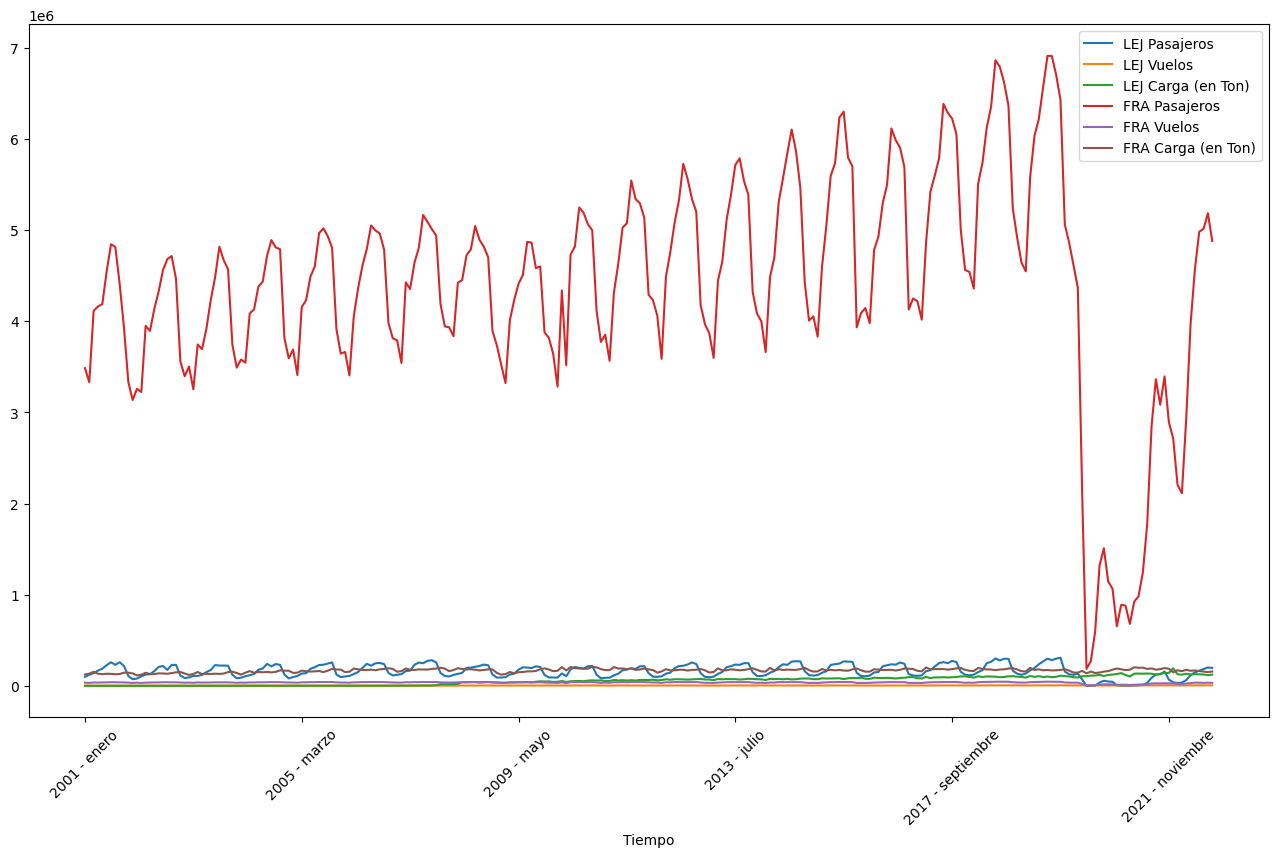

In [6]:
df.plot(xlabel="Tiempo",rot=45,figsize=(16,9))


En este segundo gráfico (más de ejercicio que de utilidad) compare el desarrollo del flujo de pasajeros y el número de vuelos entre 2001 y 2022 (corte a septiembre) agregando un plot secundario en el eje y.

<AxesSubplot:>

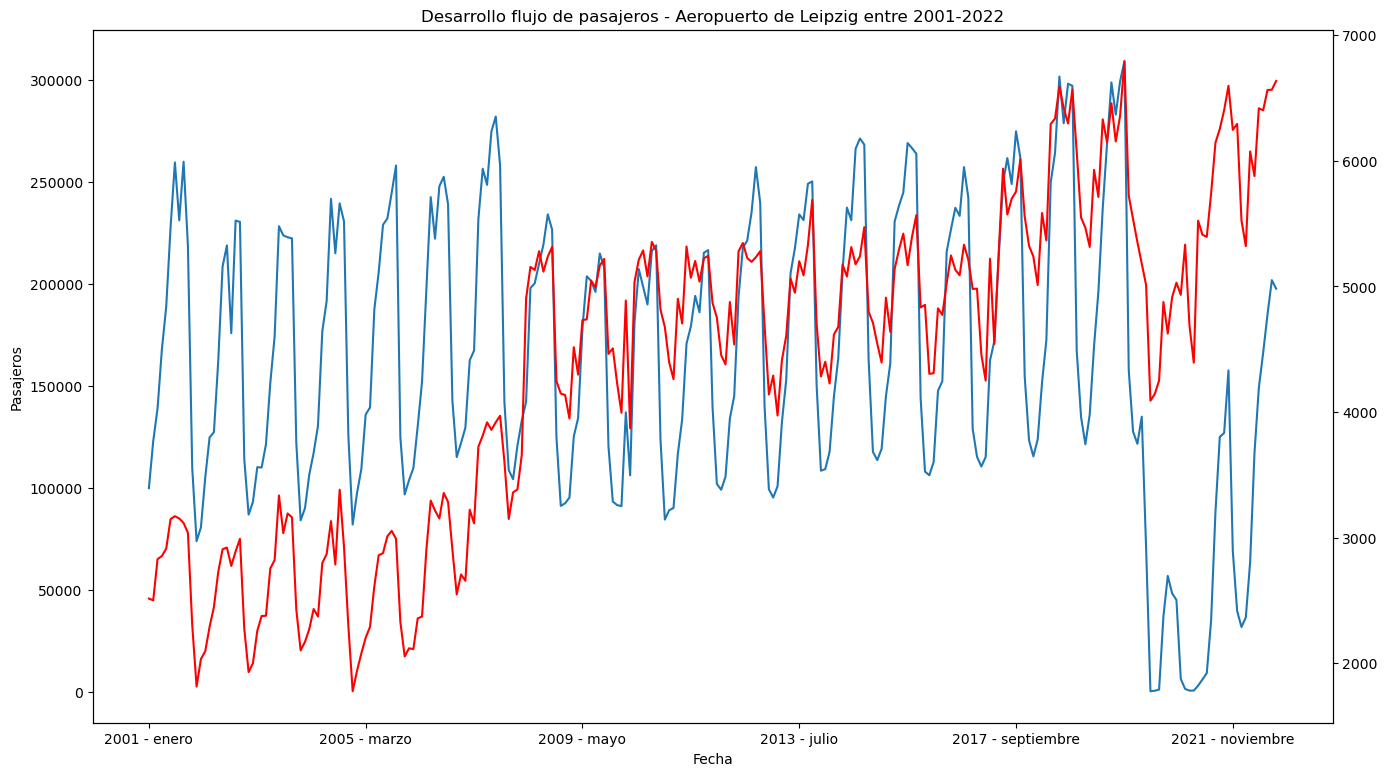

In [8]:
df["LEJ Pasajeros"].plot(kind="line",
                         grid=True,
                         title="Desarrollo flujo de pasajeros - Aeropuerto de Leipzig entre 2001-2022",
                         ylabel="Pasajeros",
                         xlabel="Tiempo", rot=45,figsize=(16,9))
df["LEJ Vuelos"].plot(secondary_y=True, style="r")

Se realiza la graficacion de las tres variables (pasajeros, vuelos y carga) para cara aeropuerto, empezando con LEJ:

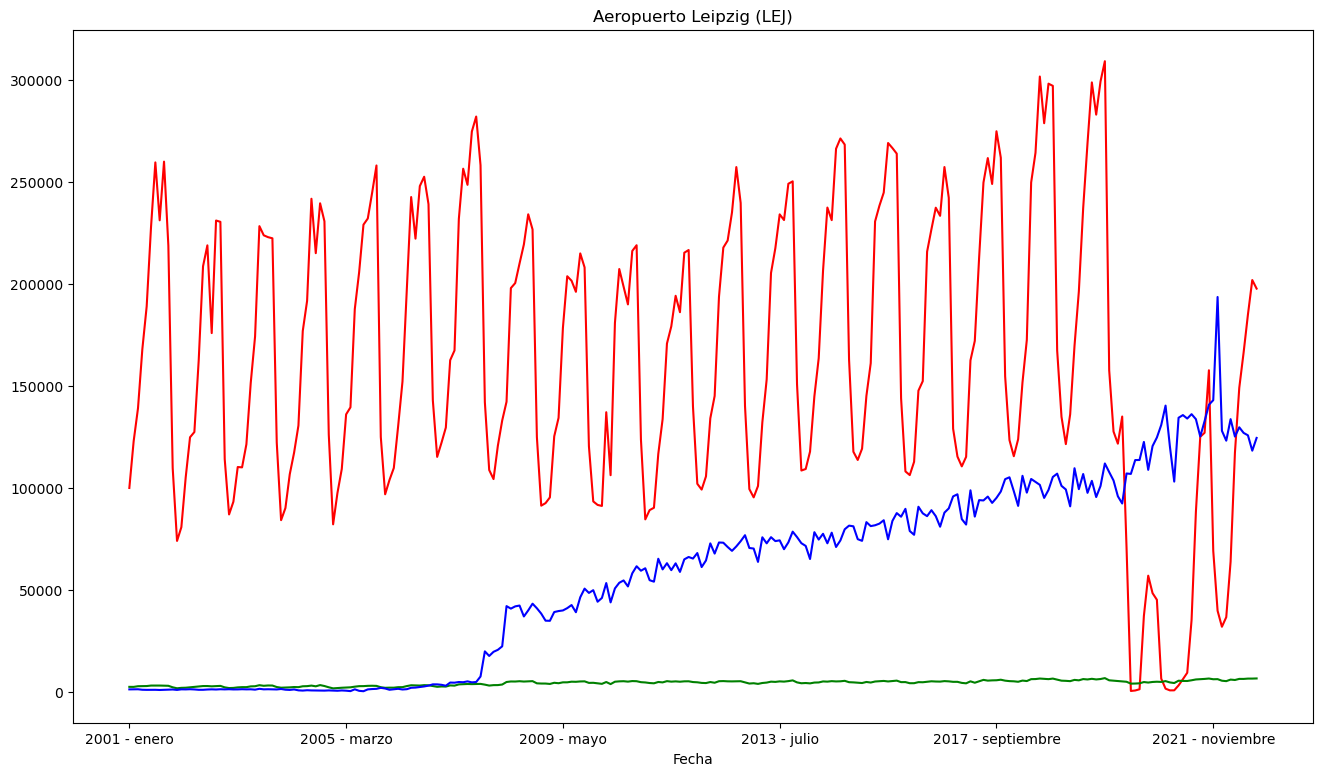

In [16]:
with pd.plotting.plot_params.use("x_compat",True):
    df["LEJ Pasajeros"].plot(color="r",title="Aeropuerto Leipzig (LEJ)", figsize=(16,9))
    df["LEJ Vuelos"].plot(color="g")
    df["LEJ Carga (en Ton)"].plot(color="b")

Y en este caso con FRA, notando el problema causado por la diferencia entre el gran flujo de pasajeros (rojo) y las otras variables:

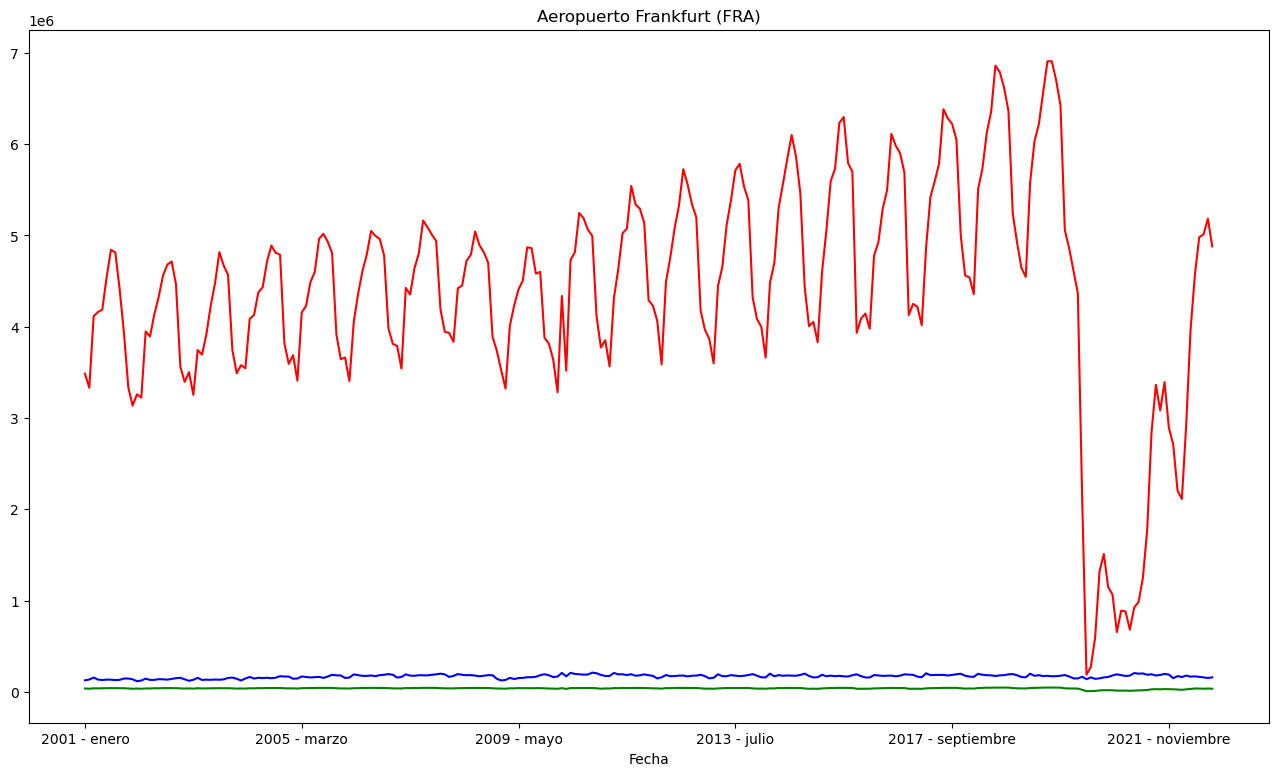

In [18]:
with pd.plotting.plot_params.use("x_compat",True):
    df["FRA Pasajeros"].plot(color="r", title="Aeropuerto Frankfurt (FRA)",figsize=(16,9))
    df["FRA Vuelos"].plot(color="g")
    df["FRA Carga (en Ton)"].plot(color="b")   

Finalmente se realizan subplots con las variables:

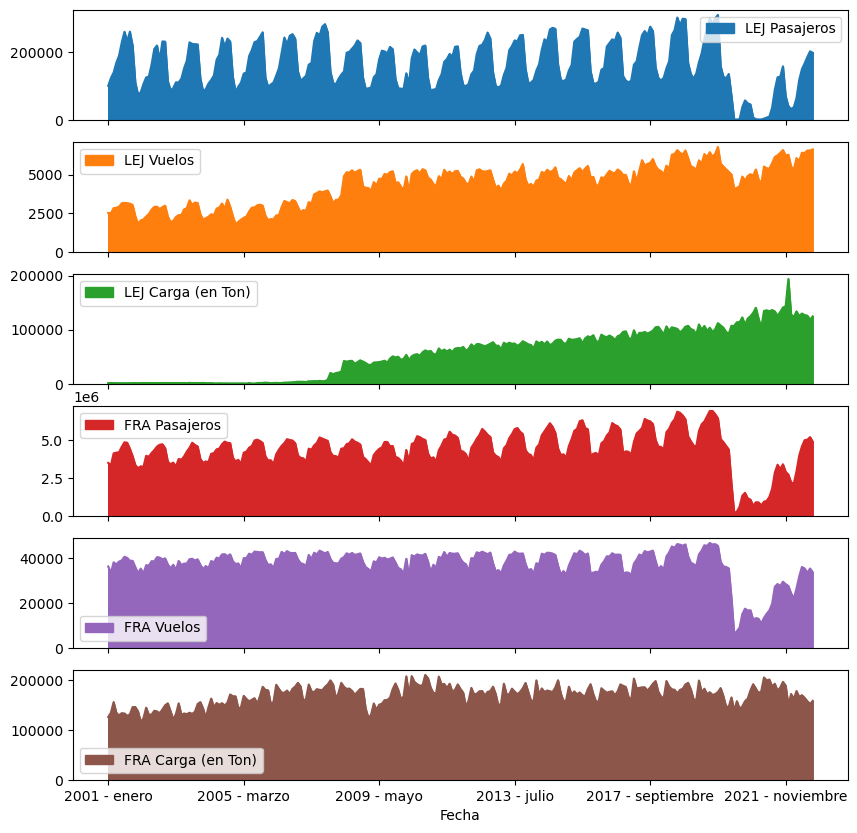

In [19]:
axs=df.plot.area(figsize=(10,10),subplots=True)

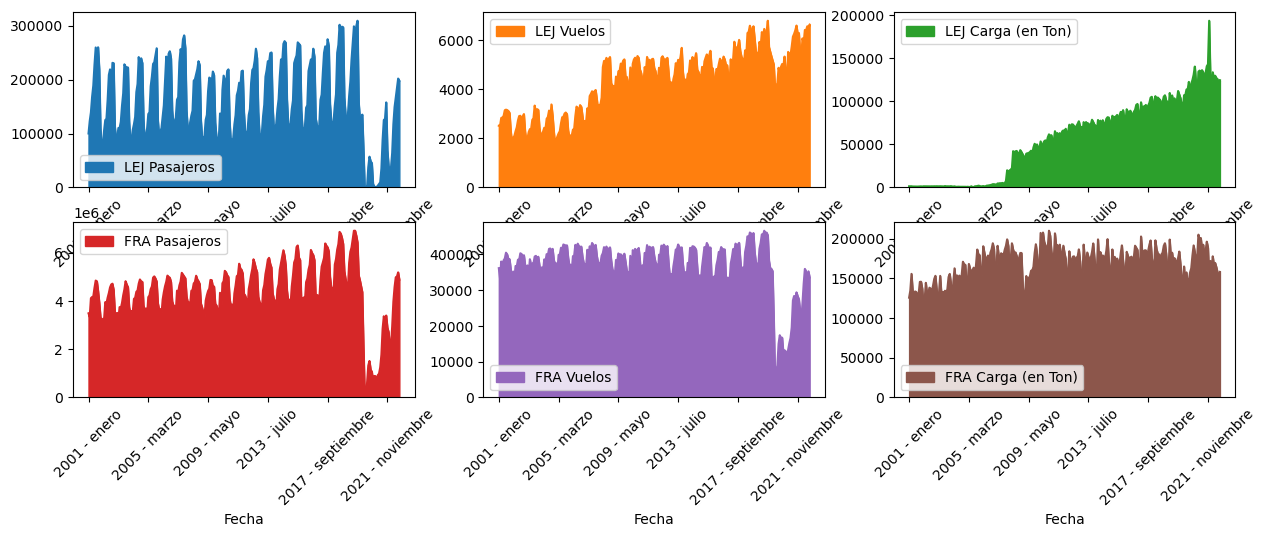

In [27]:
df.plot.area(subplots=True, layout=(2, 3), figsize=(15, 5), rot=45, sharex=False);

Se extraeran los datos (pasajeros y carga) de los aeropuertos FRA y LEJ de las tablas (estas contienen la totalidad de los aeropuertos en Alemania). Se harán los analisis de los datos y se hará la proxección de crecimiento para los siguientes años hasta encontrar la fecha estimada de recuperación en el transporte y la fecha estimada de colmación de la capacidad.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 2001 - enero to 2022 - septiembre
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LEJ Pasajeros       261 non-null    int64
 1   LEJ Vuelos          261 non-null    int64
 2   LEJ Carga (en Ton)  261 non-null    int64
 3   FRA Pasajeros       261 non-null    int64
 4   FRA Vuelos          261 non-null    int64
 5   FRA Carga (en Ton)  261 non-null    int64
dtypes: int64(6)
memory usage: 14.3+ KB


In [6]:
MinMax = df[["LEJ Pasajeros","LEJ Vuelos", "LEJ Carga (en Ton)", "FRA Pasajeros", "FRA Vuelos", "FRA Carga (en Ton)"]].agg(['min','max'])
print (MinMax)

     LEJ Pasajeros  LEJ Vuelos  LEJ Carga (en Ton)  FRA Pasajeros  FRA Vuelos  \
min            502        1776                 375         187346        6148   
max         309288        6794              193682        6909529       46598   

     FRA Carga (en Ton)  
min              115409  
max              209811  


In [7]:
cols=[0]
df_scal=df[df.columns[cols]]
df_scal.head()

,LEJ Pasajeros
Fecha,
2001 - enero,100039
2001 - febrero,123024
2001 - marzo,139184
2001 - abril,168075
2001 - mayo,189075


In [8]:
df_scal.tail()

,LEJ Pasajeros
Fecha,
2022 - mayo,149122
2022 - junio,166403
2022 - julio,185080
2022 - agosto,201995
2022 - septiembre,197792


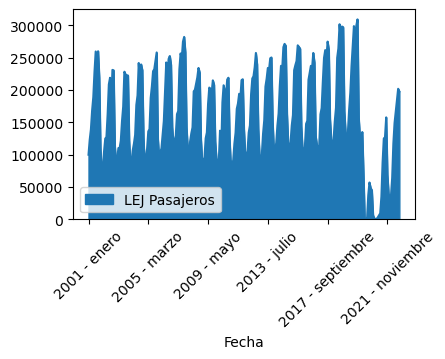

In [9]:
df_scal.plot.area(subplots=True, rot=45,layout=(2,3), figsize=(15, 6), sharex=False);
plt.show()

#### Funciones para gráficos*

**información tomada de la lección [pronóstico series temporales](https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/) del portal "aprende machine learning"*

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
PASOS=12

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [40]:
values=df_scal
values=values.astype("float32")
scaler=MinMaxScaler(feature_range=(-1,1))
values=df_scal.values.reshape(-1,1)
scaled=scaler.fit_transform(values)
reframed=series_to_supervised(scaled,PASOS,1)
reframed.head()

,var1(t+12),var1(t+11),var1(t+10),var1(t+9),var1(t+8),var1(t+7),var1(t+6),var1(t+5),var1(t+4),var1(t+3),var1(t+2),var1(t+1),var1(t)
12,-0.355301,-0.206428,-0.101760,0.085367,0.221383,0.472761,0.678671,0.494750,0.681106,0.414203,-0.292196,-0.523521,-0.479827
13,-0.206428,-0.101760,0.085367,0.221383,0.472761,0.678671,0.494750,0.681106,0.414203,-0.292196,-0.523521,-0.479827,-0.321796
14,-0.101760,0.085367,0.221383,0.472761,0.678671,0.494750,0.681106,0.414203,-0.292196,-0.523521,-0.479827,-0.321796,-0.194251
15,0.085367,0.221383,0.472761,0.678671,0.494750,0.681106,0.414203,-0.292196,-0.523521,-0.479827,-0.321796,-0.194251,-0.177689
16,0.221383,0.472761,0.678671,0.494750,0.681106,0.414203,-0.292196,-0.523521,-0.479827,-0.321796,-0.194251,-0.177689,0.049989


In [41]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 12 to 260
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   var1(t+12)  249 non-null    float64
 1   var1(t+11)  249 non-null    float64
 2   var1(t+10)  249 non-null    float64
 3   var1(t+9)   249 non-null    float64
 4   var1(t+8)   249 non-null    float64
 5   var1(t+7)   249 non-null    float64
 6   var1(t+6)   249 non-null    float64
 7   var1(t+5)   249 non-null    float64
 8   var1(t+4)   249 non-null    float64
 9   var1(t+3)   249 non-null    float64
 10  var1(t+2)   249 non-null    float64
 11  var1(t+1)   249 non-null    float64
 12  var1(t)     249 non-null    float64
dtypes: float64(13)
memory usage: 27.2 KB


<AxesSubplot:xlabel='Datos'>

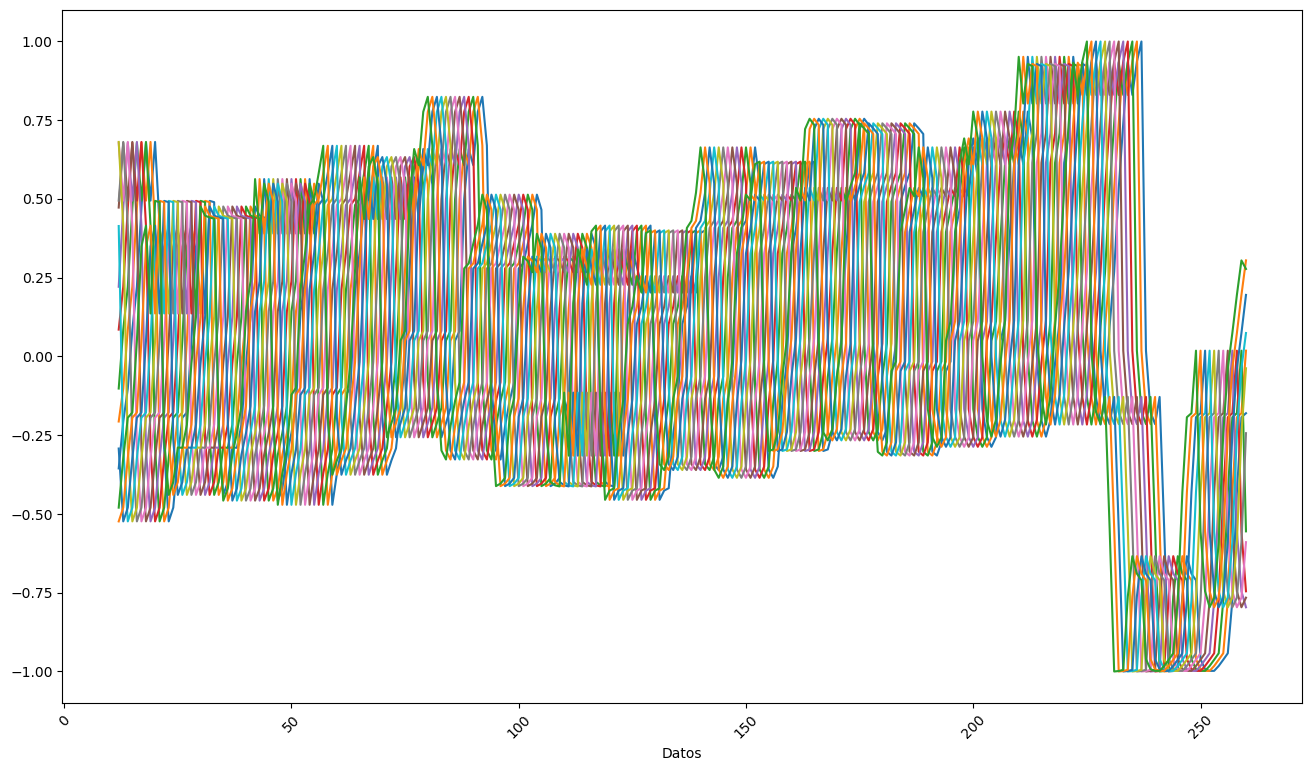

In [42]:
reframed.plot(xlabel="Datos",rot=45,figsize=(16,9),legend=False)

In [43]:
#split into train and test sets
values=reframed.values
n_train_months=261-(24+PASOS)
train=values[:n_train_months,:]
test=values[n_train_months:,:]
#split into input and outputs
x_train,y_train=train[:,:-1], train[:,-1]
x_val,y_val=test[:,:-1],test[:,-1]
#reshape input to be 3D [samples, timesteps,features]
x_train=x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
x_val=x_val.reshape((x_val.shape[0],1,x_val.shape[1]))
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(225, 1, 12) (225,) (24, 1, 12) (24,)


In [44]:
def crear_modelo():
    model=Sequential()
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation="tanh"))
    model.add(Flatten())
    model.add(Dense(1,activation="tanh"))
    model.compile(loss="mean_absolute_error",optimizer="Adam",metrics=["mse"])
    model.summary()
    return model

In [45]:
#Entrenamiento y Resultados
EPOCHS=30
model=crear_modelo()
history=model.fit(x_train,y_train,epochs=EPOCHS, validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1, 12)             156       
                                                                 
 flatten_2 (Flatten)         (None, 12)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
19/19 [==============================] - 3s 36ms/step - loss: 0.3519 - mse: 0.2163 - val_loss: 0.6299 - val_mse: 0.5450
Epoch 2/30
19/19 [==============================] - 0s 8ms/step - loss: 0.2480 - mse: 0.1172 - val_loss: 0.5471 - val_mse: 0.4407
Epoch 3/30
19/19 [==============================] - 0s 12ms

1/1 [==============================] - 0s 225ms/step


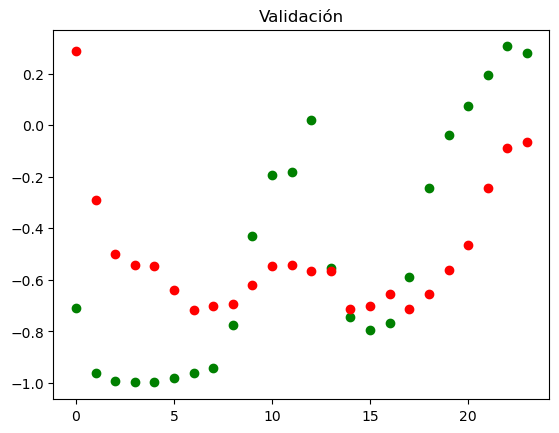

In [46]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c="g")
plt.scatter(range(len(results)),results,c="r")
plt.title("Validación")
plt.show()

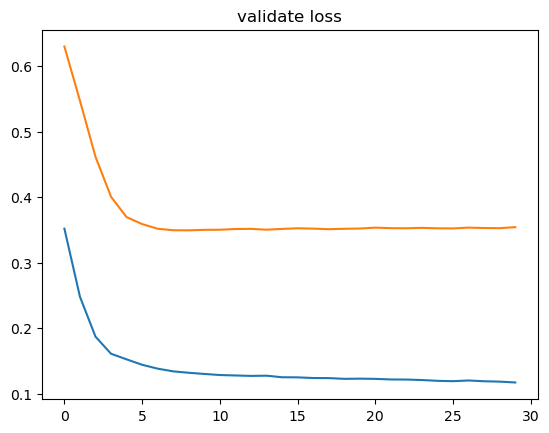

In [47]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

In [48]:
octubre2022=df_scal["2019 - octubre":"2022 - septiembre"]
octubre2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2019 - octubre to 2022 - septiembre
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LEJ Pasajeros  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0+ bytes


In [49]:
PASOS=12

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [50]:
values=octubre2022.values
values=values.astype("float32")
values=values.reshape(-1,1)
scaled=scaler.fit_transform(values)
reframed=series_to_supervised(scaled,PASOS,1)
reframed.drop(reframed.columns[[12]],axis=1,inplace=True)
reframed.head()

,var1(t+12),var1(t+11),var1(t+10),var1(t+9),var1(t+8),var1(t+7),var1(t+6),var1(t+5),var1(t+4),var1(t+3),var1(t+2),var1(t+1)
12,1.000000,0.018220,-0.176161,-0.214634,-0.128438,-0.544254,-1.000000,-0.998491,-0.994585,-0.761822,-0.633785,-0.689325
13,0.018220,-0.176161,-0.214634,-0.128438,-0.544254,-1.000000,-0.998491,-0.994585,-0.761822,-0.633785,-0.689325,-0.710388
14,-0.176161,-0.214634,-0.128438,-0.544254,-1.000000,-0.998491,-0.994585,-0.761822,-0.633785,-0.689325,-0.710388,-0.960847
15,-0.214634,-0.128438,-0.544254,-1.000000,-0.998491,-0.994585,-0.761822,-0.633785,-0.689325,-0.710388,-0.960847,-0.992720
16,-0.128438,-0.544254,-1.000000,-0.998491,-0.994585,-0.761822,-0.633785,-0.689325,-0.710388,-0.960847,-0.992720,-0.998128


In [51]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 12 to 35
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   var1(t+12)  24 non-null     float32
 1   var1(t+11)  24 non-null     float32
 2   var1(t+10)  24 non-null     float32
 3   var1(t+9)   24 non-null     float32
 4   var1(t+8)   24 non-null     float32
 5   var1(t+7)   24 non-null     float32
 6   var1(t+6)   24 non-null     float32
 7   var1(t+5)   24 non-null     float32
 8   var1(t+4)   24 non-null     float32
 9   var1(t+3)   24 non-null     float32
 10  var1(t+2)   24 non-null     float32
 11  var1(t+1)   24 non-null     float32
dtypes: float32(12)
memory usage: 1.3 KB


In [52]:
values=reframed.values
x_test=values[:,:]
x_test=x_test.reshape((x_test.shape[0],1,x_test.shape[1]))
print (x_test.shape)
x_test

(24, 1, 12)


array([[[ 0.9999999 ,  0.01821971, -0.17616087, -0.21463412,
         -0.12843847, -0.54425395, -1.        , -0.99849087,
         -0.9945852 , -0.7618221 , -0.63378525, -0.68932533]],

       [[ 0.01821971, -0.17616087, -0.21463412, -0.12843847,
         -0.54425395, -1.        , -0.99849087, -0.9945852 ,
         -0.7618221 , -0.63378525, -0.68932533, -0.7103884 ]],

       [[-0.17616087, -0.21463412, -0.12843847, -0.54425395,
         -1.        , -0.99849087, -0.9945852 , -0.7618221 ,
         -0.63378525, -0.68932533, -0.7103884 , -0.96084666]],

       [[-0.21463412, -0.12843847, -0.54425395, -1.        ,
         -0.99849087, -0.9945852 , -0.7618221 , -0.63378525,
         -0.68932533, -0.7103884 , -0.96084666, -0.9927199 ]],

       [[-0.12843847, -0.54425395, -1.        , -0.99849087,
         -0.9945852 , -0.7618221 , -0.63378525, -0.68932533,
         -0.7103884 , -0.96084666, -0.9927199 , -0.9981281 ]],

       [[-0.54425395, -1.        , -0.99849087, -0.9945852 ,
         

In [53]:
def agregarNuevoMes(x_test,nuevoMes):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i]=x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoMes
    return x_test

results=[]
for i in range (3):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoMes(x_test,parcial[0])

1/1 [==============================] - 0s 73ms/step
[[[ 0.9999999   0.01821971 -0.17616087 -0.21463412 -0.12843847
   -0.54425395 -1.         -0.99849087 -0.9945852  -0.7618221
   -0.63378525 -0.68932533]]

 [[ 0.01821971 -0.17616087 -0.21463412 -0.12843847 -0.54425395
   -1.         -0.99849087 -0.9945852  -0.7618221  -0.63378525
   -0.68932533 -0.7103884 ]]

 [[-0.17616087 -0.21463412 -0.12843847 -0.54425395 -1.
   -0.99849087 -0.9945852  -0.7618221  -0.63378525 -0.68932533
   -0.7103884  -0.96084666]]

 [[-0.21463412 -0.12843847 -0.54425395 -1.         -0.99849087
   -0.9945852  -0.7618221  -0.63378525 -0.68932533 -0.7103884
   -0.96084666 -0.9927199 ]]

 [[-0.12843847 -0.54425395 -1.         -0.99849087 -0.9945852
   -0.7618221  -0.63378525 -0.68932533 -0.7103884  -0.96084666
   -0.9927199  -0.9981281 ]]

 [[-0.54425395 -1.         -0.99849087 -0.9945852  -0.7618221
   -0.63378525 -0.68932533 -0.7103884  -0.96084666 -0.9927199
   -0.9981281  -0.99797267]]

 [[-1.         -0.9984908

In [54]:
adimen=[x for x in results]
inverted=scaler.inverse_transform(adimen)
inverted

array([[198990.56064723],
       [176165.40372438],
       [110417.26676919]])

<AxesSubplot:title={'center':'Pronostico 3 Meses'}, xlabel='Tiempo', ylabel='Pasajeros'>

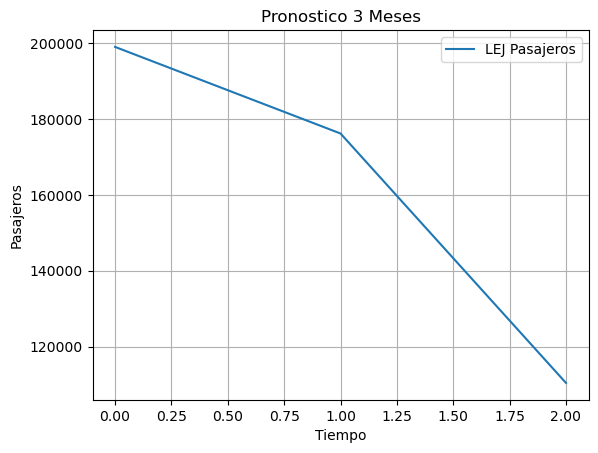

In [55]:
prediccion3M=pd.DataFrame(inverted)
prediccion3M.columns=["LEJ Pasajeros"]
prediccion3M.plot(grid=True,
                  title="Pronostico 3 Meses",
                         ylabel="Pasajeros",
                         xlabel="Tiempo")


In [56]:
prediccion3M.to_csv("pronostico_LEJ.csv")

In [74]:
df_3=pd.read_csv("pronostico_LEJ.csv",skip_blank_lines=True, header=0, index_col=0,na_filter=False)
df_3.head()

,LEJ Pasajeros
0,198990.560647
1,176165.403724
2,110417.266769


In [75]:
proyeccion_LEJ=pd.concat([df,df_3])

In [76]:
display(proyeccion_LEJ)

,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
2001 - enero,100039.000000,2514.0,1279.0,3485502.0,36134.0,125539.0
2001 - febrero,123024.000000,2500.0,1282.0,3331837.0,33304.0,134400.0
2001 - marzo,139184.000000,2828.0,1332.0,4113299.0,37997.0,155509.0
2001 - abril,168075.000000,2853.0,1094.0,4161270.0,37103.0,133906.0
2001 - mayo,189075.000000,2912.0,1046.0,4188493.0,38321.0,128859.0
...,...,...,...,...,...,...
2022 - agosto,201995.000000,6567.0,118327.0,5184080.0,35252.0,151582.0
2022 - septiembre,197792.000000,6637.0,124579.0,4879956.0,33529.0,157961.0
0,198990.560647,NaN,NaN,NaN,NaN,NaN
1,176165.403724,NaN,NaN,NaN,NaN,NaN


In [72]:
data_end=proyeccion_LEJ.tail()
for row in data_end.index:
    print(row,end=" ")

2022 - agosto 2022 - septiembre 0 1 2 

<AxesSubplot:>

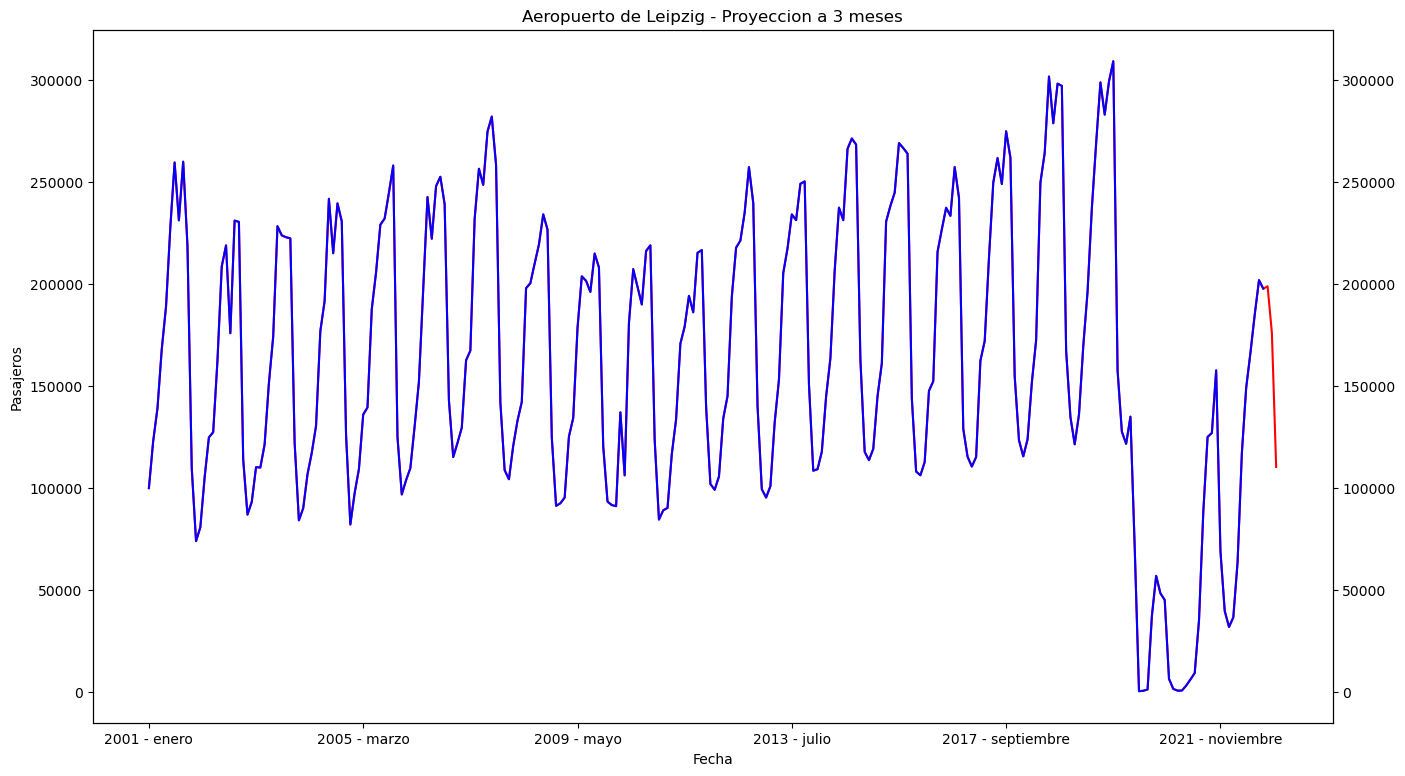

In [101]:
ax=proyeccion_LEJ["LEJ Pasajeros"].plot(kind="line",
                         grid=True,style="r",rot=45,
                         title="Aeropuerto de Leipzig - Proyeccion a 3 meses",
                         ylabel="Pasajeros",
                         xlabel="Tiempo", figsize=(16,9))
df["LEJ Pasajeros"].plot(secondary_y=True, style="b")

In [102]:
fig=ax.get_figure()
fig.savefig(r"D:\Documents\0. PERSONAL\2. Estudio\5. Data Science\Proyecto Diplomado\LEJ-3Meses.png")

#### se toma el mismo procedimiento para FRA - Pasajeros

In [103]:
cols=[3]
df_FRA=df[df.columns[cols]]
df_FRA.head()

,FRA Pasajeros
Fecha,
2001 - enero,3485502
2001 - febrero,3331837
2001 - marzo,4113299
2001 - abril,4161270
2001 - mayo,4188493


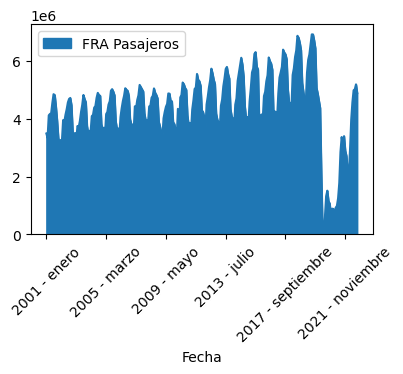

In [104]:
df_FRA.plot.area(subplots=True, rot=45,layout=(2,3), figsize=(15, 6), sharex=False);
plt.show()

In [106]:
octubre2022_FRA=df_FRA["2019 - octubre":"2022 - septiembre"]
octubre2022_FRA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2019 - octubre to 2022 - septiembre
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   FRA Pasajeros  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0+ bytes


In [111]:
#se hace lo mismo pero redefiniendo las nuevas variables (o al menos así lo expreso yo)
values=octubre2022_FRA.values
values=values.astype("float32")
values=values.reshape(-1,1)
scaled=scaler.fit_transform(values)
reframed_FRA=series_to_supervised(scaled,PASOS,1)
reframed_FRA.drop(reframed_FRA.columns[[12]],axis=1,inplace=True)
reframed_FRA.head()

,var1(t+12),var1(t+11),var1(t+10),var1(t+9),var1(t+8),var1(t+7),var1(t+6),var1(t+5),var1(t+4),var1(t+3),var1(t+2),var1(t+1)
12,1.000000,0.561354,0.497808,0.418120,0.339594,-0.379958,-1.000000,-0.972848,-0.868090,-0.637797,-0.575989,-0.692530
13,0.561354,0.497808,0.418120,0.339594,-0.379958,-1.000000,-0.972848,-0.868090,-0.637797,-0.575989,-0.692530,-0.718604
14,0.497808,0.418120,0.339594,-0.379958,-1.000000,-0.972848,-0.868090,-0.637797,-0.575989,-0.692530,-0.718604,-0.850321
15,0.418120,0.339594,-0.379958,-1.000000,-0.972848,-0.868090,-0.637797,-0.575989,-0.692530,-0.718604,-0.850321,-0.775097
16,0.339594,-0.379958,-1.000000,-0.972848,-0.868090,-0.637797,-0.575989,-0.692530,-0.718604,-0.850321,-0.775097,-0.777696


In [148]:
values=reframed_FRA.values
x_test=values[:,:]
x_test=x_test.reshape((x_test.shape[0],1,x_test.shape[1]))
print (x_test.shape)
x_test

(24, 1, 12)


array([[[ 0.29477447, -0.11432439, -0.6187035 , -0.60924554,
         -0.6267087 , -0.6158963 , -0.5052558 , -0.43507794,
          0.23453276,  0.50739926,  0.38340738,  0.25201595]],

       [[ 0.5613537 ,  0.4978075 ,  0.41811967,  0.33959353,
         -0.3799578 , -1.        , -0.9728484 , -0.8680903 ,
         -0.6377969 , -0.57598907, -0.69253016, -0.7186036 ]],

       [[ 0.4978075 ,  0.41811967,  0.33959353, -0.3799578 ,
         -1.        , -0.9728484 , -0.8680903 , -0.6377969 ,
         -0.57598907, -0.69253016, -0.7186036 , -0.8503211 ]],

       [[ 0.41811967,  0.33959353, -0.3799578 , -1.        ,
         -0.9728484 , -0.8680903 , -0.6377969 , -0.57598907,
         -0.69253016, -0.7186036 , -0.8503211 , -0.7750968 ]],

       [[ 0.33959353, -0.3799578 , -1.        , -0.9728484 ,
         -0.8680903 , -0.6377969 , -0.57598907, -0.69253016,
         -0.7186036 , -0.8503211 , -0.7750968 , -0.77769625]],

       [[-0.3799578 , -1.        , -0.9728484 , -0.8680903 ,
         

In [149]:
def agregarNuevoMes(x_test,nuevoMes):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i]=x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoMes
    return x_test

results=[]
for i in range (3):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoMes(x_test,parcial[0])

1/1 [==============================] - 0s 41ms/step
[[[ 0.29477447 -0.11432439 -0.6187035  -0.60924554 -0.6267087
   -0.6158963  -0.5052558  -0.43507794  0.23453276  0.50739926
    0.38340738  0.25201595]]

 [[ 0.5613537   0.4978075   0.41811967  0.33959353 -0.3799578
   -1.         -0.9728484  -0.8680903  -0.6377969  -0.57598907
   -0.69253016 -0.7186036 ]]

 [[ 0.4978075   0.41811967  0.33959353 -0.3799578  -1.
   -0.9728484  -0.8680903  -0.6377969  -0.57598907 -0.69253016
   -0.7186036  -0.8503211 ]]

 [[ 0.41811967  0.33959353 -0.3799578  -1.         -0.9728484
   -0.8680903  -0.6377969  -0.57598907 -0.69253016 -0.7186036
   -0.8503211  -0.7750968 ]]

 [[ 0.33959353 -0.3799578  -1.         -0.9728484  -0.8680903
   -0.6377969  -0.57598907 -0.69253016 -0.7186036  -0.8503211
   -0.7750968  -0.77769625]]

 [[-0.3799578  -1.         -0.9728484  -0.8680903  -0.6377969
   -0.57598907 -0.69253016 -0.7186036  -0.8503211  -0.7750968
   -0.77769625 -0.8419546 ]]

 [[-1.         -0.9728484  -

In [150]:
adimen=[x for x in results]
inverted=scaler.inverse_transform(adimen)
inverted

array([[4108872.22313989],
       [3411737.06742578],
       [1991245.02150674]])

<AxesSubplot:title={'center':'FRA - Pronostico 3 Meses'}, xlabel='Tiempo', ylabel='Pasajeros'>

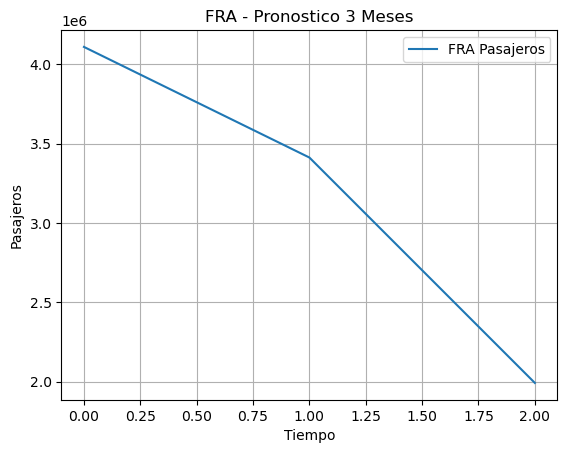

In [151]:
prediccion3M_FRA=pd.DataFrame(inverted)
prediccion3M_FRA.columns=["FRA Pasajeros"]
prediccion3M_FRA.plot(grid=True,
                  title="FRA - Pronostico 3 Meses",
                         ylabel="Pasajeros",
                         xlabel="Tiempo")


In [152]:
prediccion3M_FRA.to_csv("pronostico_FRA.csv")

In [153]:
df_3FRA=pd.read_csv("pronostico_FRA.csv",skip_blank_lines=True, header=0, index_col=0,na_filter=False)
df_3FRA.head()

,FRA Pasajeros
0,4.108872e+06
1,3.411737e+06
2,1.991245e+06


In [154]:
proyeccion=pd.concat([df,df_3FRA])

In [155]:
display(proyeccion)

,LEJ Pasajeros,LEJ Vuelos,LEJ Carga (en Ton),FRA Pasajeros,FRA Vuelos,FRA Carga (en Ton)
2001 - enero,100039.0,2514.0,1279.0,3.485502e+06,36134.0,125539.0
2001 - febrero,123024.0,2500.0,1282.0,3.331837e+06,33304.0,134400.0
2001 - marzo,139184.0,2828.0,1332.0,4.113299e+06,37997.0,155509.0
2001 - abril,168075.0,2853.0,1094.0,4.161270e+06,37103.0,133906.0
2001 - mayo,189075.0,2912.0,1046.0,4.188493e+06,38321.0,128859.0
...,...,...,...,...,...,...
2022 - agosto,201995.0,6567.0,118327.0,5.184080e+06,35252.0,151582.0
2022 - septiembre,197792.0,6637.0,124579.0,4.879956e+06,33529.0,157961.0
0,NaN,NaN,NaN,4.108872e+06,NaN,NaN
1,NaN,NaN,NaN,3.411737e+06,NaN,NaN


<AxesSubplot:>

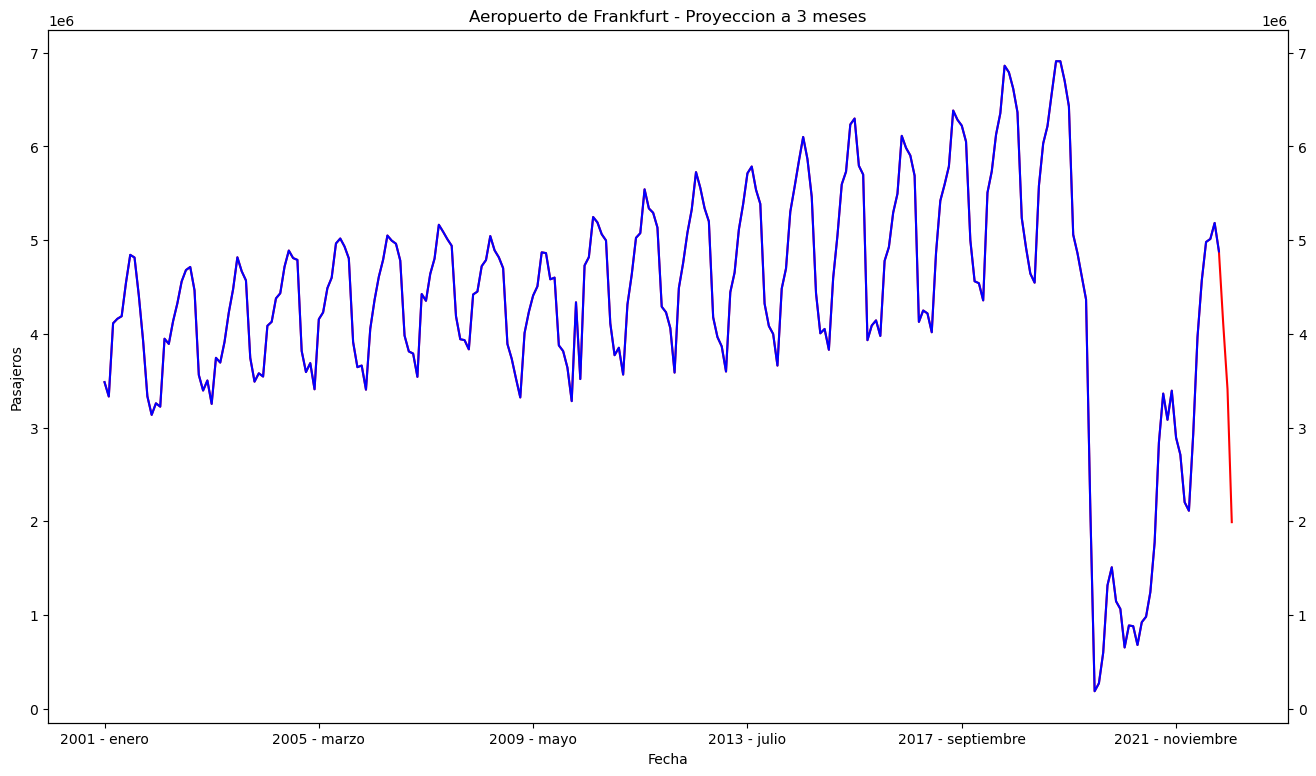

In [156]:
ax_FRA=proyeccion["FRA Pasajeros"].plot(kind="line",
                         grid=True,style="r",rot=45,
                         title="Aeropuerto de Frankfurt - Proyeccion a 3 meses",
                         ylabel="Pasajeros",
                         xlabel="Tiempo", figsize=(16,9))
df["FRA Pasajeros"].plot(secondary_y=True, style="b")

In [157]:
fig=ax_FRA.get_figure()
fig.savefig(r"D:\Documents\0. PERSONAL\2. Estudio\5. Data Science\Proyecto Diplomado\FRA-3Meses_2.png")

##### Fuentes

- [Desarrollo LEJ (hasta 2014)](https://web.archive.org/web/20150119194227/http://www.leipzig-halle-airport.de/unternehmen/ueber-uns/zahlen-und-fakten/entwicklung-158.html)
- [Capacidad Instalada LEJ](https://www.leipzig.de/wirtschaft-und-wissenschaft/investieren-in-leipzig/infrastruktur/verkehrsinfrastruktur/flughafen-leipzighalle/)
- [Datos](https://www.adv.aero/service/downloadbibliothek/)
- [Reportes](https://branchenreport.bdl.aero/)